In [16]:
from conexionbd import DAO


# Datos de tabla modelos GD para extraccion part number
query_final_partnumber = """
SELECT 
	SN.DS_PartNumber PARTNUMBER, 
	SN.DS_IMPORTADOR,
    SN.DS_LIBR_TRIBU
FROM dw.SN_DataSunat SN
WHERE SN.DS_LIBR_TRIBU IN (
                                        SELECT RUC
                                        FROM
                                        (
                                        SELECT DS_LIBR_TRIBU RUC,
                                                COUNT(*) IMPORTACIONES
                                        FROM dw.SN_DataSunat
                                        WHERE DS_LIBR_TRIBU <> 'No Disponi.'
                                        GROUP BY DS_IMPORTADOR
                                        ORDER BY 2 DESC
                                        LIMIT 30
                                        ) IMPORTADORES
                        )
# AND DS_PartNumber = '82RK00WCLM'                        
AND DS_FECHA >= '2019-01-01' AND  DS_FECHA < '2024-12-01' 
AND DS_PARTNUMBER IS NOT NULL
GROUP BY SN.DS_PARTNUMBER, SN.DS_IMPORTADOR                
"""

columns_partnumber = ['PART_NUMBER', 'IMPORTADOR','RUC']


data = DAO().carga_data_sql(query_final_partnumber, columns_partnumber)
data['IMPORTADOR'] = data['IMPORTADOR'].str.strip().str.upper()
data


Conexión exitosa a la base de datos en 0.008919000625610352 segundos
Se obtuvieron 23759 datos en 3.939136505126953 segundos


,PART_NUMBER,IMPORTADOR,RUC
0,001N00518,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
1,001R00600,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
2,001R00610,COMPUDISKETT S R L,20123053037
3,001R00610,INGRAM MICRO S.A.C.,20267163228
4,001R00610,MAXIMA INTERNACIONAL S.A.,20127745910
...,...,...,...
23754,ZP500CV3A001,IMPORT NOTEBOOK SOCIEDAD ANONIMA CERRADA,20538893791
23755,ZP500CV3A001,MAXIMA INTERNACIONAL S.A.,20127745910
23756,ZP500GM3A001,GRUPO DELTRON S.A.,20212331377
23757,ZP500GM3A013,GRUPO DELTRON S.A.,20212331377


In [17]:
data.head(100)

,PART_NUMBER,IMPORTADOR,RUC
0,001N00518,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
1,001R00600,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
2,001R00610,COMPUDISKETT S R L,20123053037
3,001R00610,INGRAM MICRO S.A.C.,20267163228
4,001R00610,MAXIMA INTERNACIONAL S.A.,20127745910
...,...,...,...
95,006R03015,INGRAM MICRO S.A.C.,20267163228
96,006R03015,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
97,006R03016,INGRAM MICRO S.A.C.,20267163228
98,006R03016,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065


In [18]:
importadores = data['IMPORTADOR'].unique()


dict_importadores = {}
for importador in importadores:
    list_partnumber = data['PART_NUMBER'][(data['IMPORTADOR']==importador) & ~(data['PART_NUMBER'].isnull())].values
    dict_importadores[importador] = list_partnumber

print(dict_importadores)

{'PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU': array(['001N00518', '001R00600', '001R00610', '001R00613', '006R01160',
       '006R01175', '006R01176', '006R01177', '006R01238', '006R01261',
       '006R01276', '006R01399', '006R01400', '006R01401', '006R01402',
       '006R01429', '006R01430', '006R01461', '006R01462', '006R01463',
       '006R01464', '006R01517', '006R01518', '006R01519', '006R01520',
       '006R01529', '006R01530', '006R01531', '006R01532', '006R01551',
       '006R01552', '006R01561', '006R01573', '006R01606', '006R03008',
       '006R03013', '006R03015', '006R03016', '006R03017', '006R03182',
       '006R03183', '006R03184', '008R12903', '008R12990', '008R13061',
       '008R13063', '008R13064', '008R13086', '008R13088', '008R13089',
       '008R13178', '011N00571', '013R00591', '013R00623', '013R00624',
       '013R00647', '013R00650', '013R00657', '013R00658', '013R00659',
       '013R00660', '013R00662', '013R00670', '019N00957', '019N00998',
       '059K48900',

In [19]:

from matplotlib import axis


df_deltron = data[(data['IMPORTADOR']=='GRUPO DELTRON S.A.') & ~(data['PART_NUMBER'].isnull())]


def comparison_partnumber(serie, list_partnumber):
    
    for partnumber in list_partnumber:
       if serie in partnumber:
           return 1
    return 0


for importador in importadores:
    if importador in dict_importadores.keys():
        df_deltron[f"part_number_{importador}"] = df_deltron['PART_NUMBER'].apply(comparison_partnumber, args=(dict_importadores.get(importador),))
    


df_deltron = df_deltron.drop_duplicates(subset=['PART_NUMBER'], keep='first')


df_deltron.to_excel('partnumber_deltron.xlsx', index=False)
df_filtrado = df_deltron[df_deltron['PART_NUMBER'] == '82RK00WCLM']
df_filtrado.head()




C:\Users\gustavo.grillo\AppData\Local\Temp\ipykernel_2488\1209115263.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deltron[f"part_number_{importador}"] = df_deltron['PART_NUMBER'].apply(comparison_partnumber, args=(dict_importadores.get(importador),))
C:\Users\gustavo.grillo\AppData\Local\Temp\ipykernel_2488\1209115263.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deltron[f"part_number_{importador}"] = df_deltron['PART_NUMBER'].apply(comparison_partnumber, args=(dict_importadores.get(imp

,PART_NUMBER,IMPORTADOR,RUC,part_number_PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,part_number_COMPUDISKETT S R L,part_number_INGRAM MICRO S.A.C.,part_number_MAXIMA INTERNACIONAL S.A.,part_number_XEROX DEL PERU S A,part_number_GRUPO DELTRON S.A.,part_number_DATACONT S.A.C.,...,part_number_IBM DEL PERU S A C,part_number_HUAWEI DEL PERU SAC,part_number_ROCKWELL AUTOMATION DE PERU S.A,part_number_EXPORTADORA IMPORTADORA IGARASHI ASCENCI,part_number_RICOH DEL PERU S.A.C.,part_number_DELL PERU S.A.C,part_number_IMPORTACIONES PEREZ SOCIEDAD ANONIMA CER,part_number_SAMSUNG ELECTRONICS PERU SAC,part_number_CORPORACION ANDES PRODUCTS SOCIEDAD ANON,part_number_BROTHER INTERNATIONAL DEL PERU S.A.C.
9133,82RK00WCLM,GRUPO DELTRON S.A.,20212331377,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:

columnas_part_number = df_deltron.columns[df_deltron.columns.str.startswith('part_number_')].tolist()
df_deltron = df_deltron.melt(
    id_vars=['PART_NUMBER'],
    value_vars=columnas_part_number,
    var_name='IMPORTADOR',
    value_name='PART_NUMBER_DELTRON'
)

df_deltron.to_excel('partnumber_deltron_normalizado.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'partnumber_deltron_normalizado.xlsx'

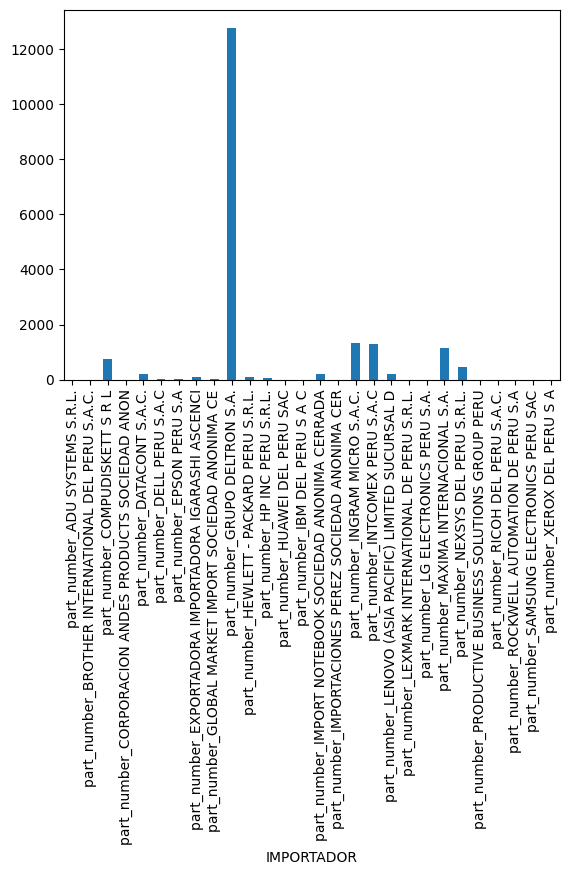

In [21]:
import matplotlib.pyplot as plt

# grafico de barras

df_deltron.groupby('IMPORTADOR')['PART_NUMBER_DELTRON'].sum().plot(kind='bar')
plt.show()

In [59]:
from conexionbd import DAO


# Datos de tabla modelos GD para extraccion part number
query_final_partnumber = """
SELECT 
    SN.ID,
	SN.DS_PartNumber PARTNUMBER, 
	SN.DS_IMPORTADOR,
    SN.DS_LIBR_TRIBU
FROM dw.SN_DataSunat SN
WHERE SN.DS_LIBR_TRIBU IN (
                                        SELECT RUC
                                        FROM
                                        (
                                        SELECT DS_LIBR_TRIBU RUC,
                                                COUNT(*) IMPORTACIONES
                                        FROM dw.SN_DataSunat
                                        WHERE DS_LIBR_TRIBU <> 'No Disponi.'
                                        GROUP BY DS_IMPORTADOR
                                        ORDER BY 2 DESC
                                        LIMIT 30
                                        ) IMPORTADORES
                        )            
AND DS_FECHA >= '2019-01-01' AND  DS_FECHA < '2024-12-01' 
AND DS_PARTNUMBER IS NOT NULL
GROUP BY SN.DS_PARTNUMBER, SN.DS_IMPORTADOR                
"""

columns_partnumber = ['ID','PART_NUMBER', 'IMPORTADOR','RUC']


data_arroba = DAO().carga_data_sql(query_final_partnumber, columns_partnumber)
data_arroba['IMPORTADOR'] = data_arroba['IMPORTADOR'].str.strip().str.upper()
data_arroba

Conexión exitosa a la base de datos en 0.0040438175201416016 segundos
Se obtuvieron 24077 datos en 2.814870595932007 segundos


,ID,PART_NUMBER,IMPORTADOR,RUC
0,535667,001N00518,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
1,565279,001R00600,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
2,36639,001R00610,COMPUDISKETT S R L,20123053037
3,526765,001R00610,INGRAM MICRO S.A.C.,20267163228
4,522202,001R00610,MAXIMA INTERNACIONAL S.A.,20127745910
...,...,...,...,...
24072,1224194,ZP500CV3A001,IMPORT NOTEBOOK SOCIEDAD ANONIMA CERRADA,20538893791
24073,1222992,ZP500CV3A001,MAXIMA INTERNACIONAL S.A.,20127745910
24074,780977,ZP500GM3A001,GRUPO DELTRON S.A.,20212331377
24075,1229510,ZP500GM3A013,GRUPO DELTRON S.A.,20212331377


In [61]:
print(data_arroba[data_arroba['ID'] == '146432'])


Empty DataFrame
Columns: [ID, PART_NUMBER, IMPORTADOR, RUC]
Index: []


In [55]:
def withdraw_words(x):
    if x is not None and x.startswith("@"):
        return x[x.find("-")+1:]
    else:
        return x

data_arroba['PART_NUMBER'] = data_arroba['PART_NUMBER'].apply(withdraw_words)
data_arroba

,ID,PART_NUMBER,IMPORTADOR,RUC
0,535667,001N00518,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
1,565279,001R00600,PRODUCTIVE BUSINESS SOLUTIONS GROUP PERU,20100119065
2,36639,001R00610,COMPUDISKETT S R L,20123053037
3,526765,001R00610,INGRAM MICRO S.A.C.,20267163228
4,522202,001R00610,MAXIMA INTERNACIONAL S.A.,20127745910
...,...,...,...,...
24571,1224194,ZP500CV3A001,IMPORT NOTEBOOK SOCIEDAD ANONIMA CERRADA,20538893791
24572,1222992,ZP500CV3A001,MAXIMA INTERNACIONAL S.A.,20127745910
24573,780977,ZP500GM3A001,GRUPO DELTRON S.A.,20212331377
24574,1229510,ZP500GM3A013,GRUPO DELTRON S.A.,20212331377


In [56]:
print(data_arroba[data_arroba['ID'] == 146432])

           ID      PART_NUMBER          IMPORTADOR          RUC
13408  146432  90NR0A40-R00013  GRUPO DELTRON S.A.  20212331377


In [57]:
df_to_sql = data_arroba[['PART_NUMBER','ID']]
df_to_sql

df_to_sql_filtrado = df_to_sql[df_to_sql['ID'] == 146432]
print(df_to_sql_filtrado)

           PART_NUMBER      ID
13408  90NR0A40-R00013  146432


In [58]:
DAO().actualiza_data_sql(df_to_sql, 'PART_NUMBER', 'ID')


Conexión exitosa a la base de datos en 0.04480719566345215 segundos
('001N00518', 535667)
('001R00600', 565279)
('001R00610', 36639)
('001R00610', 526765)
('001R00610', 522202)
('001R00610', 511518)
('001R00613', 62184)
('001R00613', 129283)
('001R00613', 1689)
('001R00613', 511519)
('001R00613', 32687)
('006R01046', 547027)
('006R01160', 36498)
('006R01160', 576672)
('006R01160', 577676)
('006R01160', 576355)
('006R01175', 1092321)
('006R01176', 1094951)
('006R01177', 1094953)
('006R01182', 554894)
('006R01238', 1932462)
('006R01238', 1079197)
('006R01261', 576311)
('006R01261', 5467)
('006R01276', 511445)
('006R01319', 561185)
('006R01399', 578008)
('006R01399', 547049)
('006R01400', 547020)
('006R01401', 547065)
('006R01402', 547022)
('006R01402', 547048)
('006R01414', 565651)
('006R01429', 565937)
('006R01430', 529481)
('006R01430', 565742)
('006R01461', 139854)
('006R01461', 577302)
('006R01461', 576713)
('006R01461', 576579)
('006R01461', 92360)
('006R01462', 577865)
('006R01462'